In [1]:
from tqdm import tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df_democrats = pd.read_csv('reddit_opinion_democrats.csv')
df_republicans = pd.read_csv('reddit_opinion_republican.csv')

df_democrats['party'] = 'Democrat'
df_republicans['party'] = 'Republican'

df = pd.concat([df_democrats, df_republicans], ignore_index=True)

In [3]:
df

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time,party
0,lwqcyuz,1,Not the only. But it is a reason.,politics,2024-11-12 11:13:17,1gpex5t,Zealousideal-Olive55,0,1,0,...,3061.0,3062.0,4,NaN,Biden’s internal polling showed Trump winning ...,0.55,4,0,2024-11-12 06:53:55,Democrat
1,lwqcy7d,1,https://preview.redd.it/fnpb09xqeg0e1.jpeg?wid...,neoliberal,2024-11-12 11:13:05,1gpf04s,Trojan_Horse_of_Fate,0,1,0,...,91031.0,94293.0,3,The [discussion thread](https://neoliber.al/dt...,Discussion Thread,0.55,3,0,2024-11-12 07:00:07,Democrat
2,lwqcy5p,1,&gt; I know one of the moderators of r/conspir...,conspiracy,2024-11-12 11:13:04,1gpgvec,Red-Vagabond,0,1,0,...,27645.0,28954.0,88,"Hey peeps, I wanna keep this as short as possi...","I gained 300,000 karma in a half a year on Red...",0.70,88,0,2024-11-12 09:22:38,Democrat
3,lwqcy2q,1,or when they bought Boots skincare and became ...,neoliberal,2024-11-12 11:13:03,1gpf04s,Roseartcrantz,0,1,0,...,198571.0,203707.0,3,The [discussion thread](https://neoliber.al/dt...,Discussion Thread,0.55,3,0,2024-11-12 07:00:07,Democrat
4,lwqcx40,1,"Respectfully. yeah nah, the time for civility ...",politics,2024-11-12 11:12:46,1gp6owu,Vaperius,0,1,0,...,312158.0,361750.0,2640,NaN,AOC denounces anyone engaging in online vitrio...,0.90,2640,0,2024-11-11 23:33:11,Democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7929727,dn4w23l,2,Good bot,ConservativeDemocrat,2017-09-17 18:54:07,70l48o,[deleted],0,2,0,...,0.0,0.0,13,NaN,Trump and Schumer Wrong on Trade,1.00,13,0,2017-09-17 02:44:34,Republican
7929728,dn4guol,3,The top level post has been removed.,ConservativeDemocrat,2017-09-17 13:42:04,70l48o,DuplicatesBot,0,3,0,...,17615.0,17707.0,13,NaN,Trump and Schumer Wrong on Trade,1.00,13,0,2017-09-17 02:44:34,Republican
7929729,dn4ewd5,1,delete,ConservativeDemocrat,2017-09-17 12:43:05,70l48o,Autarch_Severian,0,1,0,...,9094.0,13129.0,13,NaN,Trump and Schumer Wrong on Trade,1.00,13,0,2017-09-17 02:44:34,Republican
7929730,dn4dwix,2,*Third Way had an article*\n\n*on all the time...,ConservativeDemocrat,2017-09-17 12:11:31,70l48o,I_am_a_haiku_bot,0,2,0,...,0.0,0.0,13,NaN,Trump and Schumer Wrong on Trade,1.00,13,0,2017-09-17 02:44:34,Republican


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7929732 entries, 0 to 7929731
Data columns (total 25 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   comment_id                  object 
 1   score                       int64  
 2   self_text                   object 
 3   subreddit                   object 
 4   created_time                object 
 5   post_id                     object 
 6   author_name                 object 
 7   controversiality            int64  
 8   ups                         int64  
 9   downs                       int64  
 10  user_is_verified            bool   
 11  user_account_created_time   object 
 12  user_awardee_karma          float64
 13  user_awarder_karma          float64
 14  user_link_karma             float64
 15  user_comment_karma          float64
 16  user_total_karma            float64
 17  post_score                  int64  
 18  post_self_text              object 
 19  post_title           

In [5]:
df.describe()

,score,controversiality,ups,downs,user_awardee_karma,user_awarder_karma,user_link_karma,user_comment_karma,user_total_karma,post_score,post_upvote_ratio,post_thumbs_ups,post_total_awards_received
count,7.929732e+06,7.929732e+06,7.929732e+06,7929732.0,7.929459e+06,7.929459e+06,7.929459e+06,7.929459e+06,7.929459e+06,7.929732e+06,7.929732e+06,7.929732e+06,7929732.0
mean,2.782637e+01,4.879383e-02,2.782637e+01,0.0,8.113960e+02,3.083499e+02,2.219592e+04,1.071642e+05,1.304799e+05,3.070721e+03,8.032062e-01,3.070721e+03,0.0
std,2.098598e+02,2.154368e-01,2.098598e+02,0.0,4.239424e+03,2.247218e+03,1.929635e+05,2.184063e+05,3.223466e+05,6.382154e+03,2.368690e-01,6.382154e+03,0.0
min,-1.209000e+03,0.000000e+00,-1.209000e+03,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+02,-9.900000e+01,0.000000e+00,1.000000e-02,0.000000e+00,0.0
25%,1.000000e+00,0.000000e+00,1.000000e+00,0.0,0.000000e+00,0.000000e+00,6.000000e+01,8.955000e+03,1.063700e+04,7.600000e+01,7.200000e-01,7.600000e+01,0.0
50%,4.000000e+00,0.000000e+00,4.000000e+00,0.0,1.100000e+02,0.000000e+00,8.500000e+02,3.616000e+04,4.144900e+04,5.630000e+02,9.200000e-01,5.630000e+02,0.0
75%,1.300000e+01,0.000000e+00,1.300000e+01,0.0,5.730000e+02,5.800000e+01,5.692000e+03,1.125290e+05,1.285330e+05,3.187000e+03,9.600000e-01,3.187000e+03,0.0
max,3.191000e+04,1.000000e+00,3.191000e+04,0.0,6.341870e+05,6.556090e+05,1.569747e+07,9.018347e+06,1.671461e+07,1.060680e+05,1.000000e+00,1.060680e+05,0.0


In [6]:
df.isnull().sum()

comment_id                          0
score                               0
self_text                          43
subreddit                           0
created_time                        0
post_id                             0
author_name                         0
controversiality                    0
ups                                 0
downs                               0
user_is_verified                    0
user_account_created_time      202405
user_awardee_karma                273
user_awarder_karma                273
user_link_karma                   273
user_comment_karma                273
user_total_karma                  273
post_score                          0
post_self_text                6143907
post_title                          0
post_upvote_ratio                   0
post_thumbs_ups                     0
post_total_awards_received          0
post_created_time                   0
party                               0
dtype: int64

c:\Users\ericp\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ericp\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ericp\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ericp\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


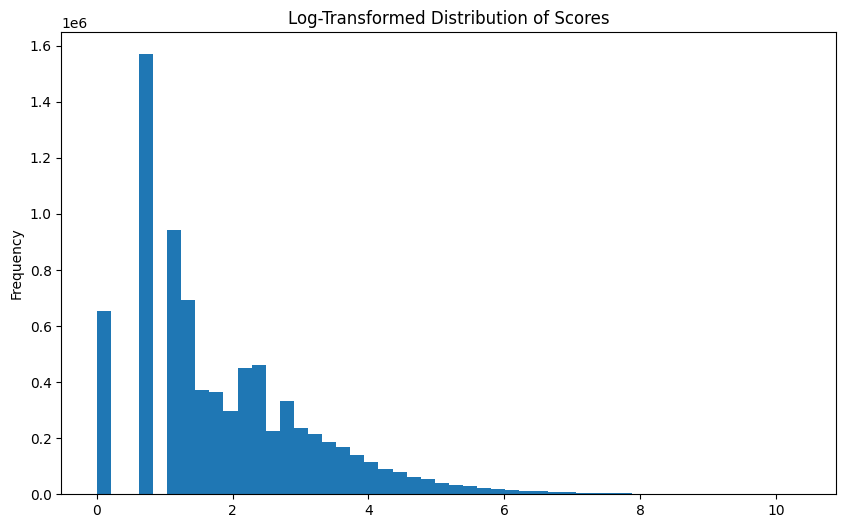

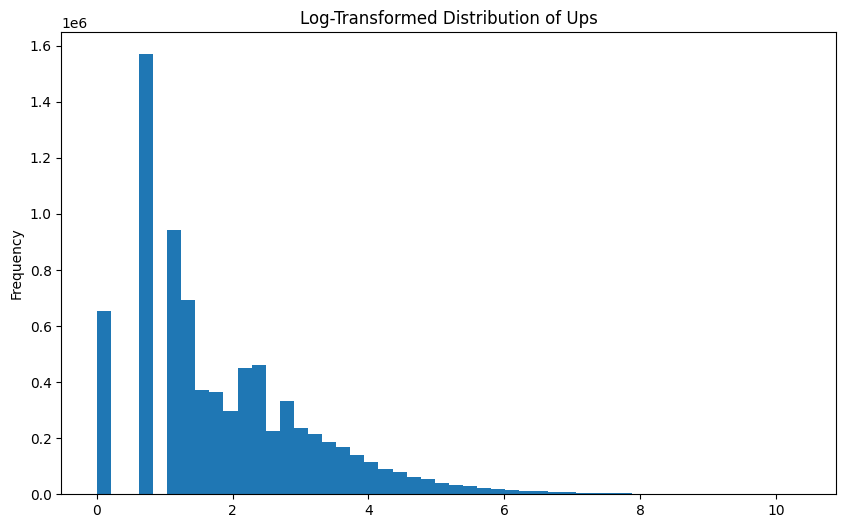

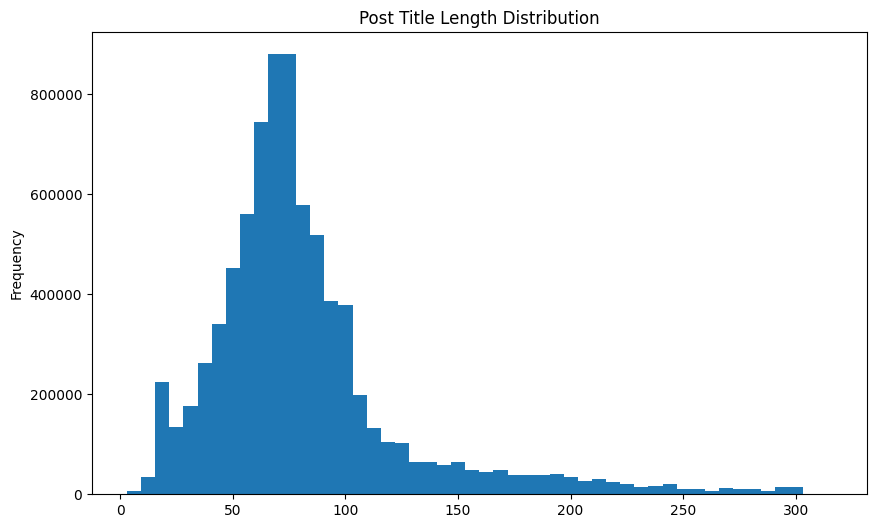

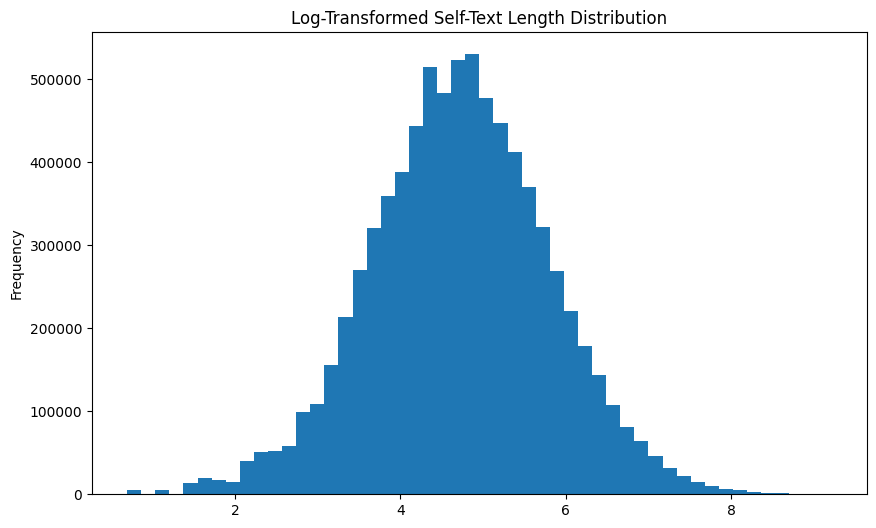

In [7]:
df['score_log'] = np.log1p(df['score']).replace([np.inf, -np.inf, np.nan], 0)
df['ups_log'] = np.log1p(df['ups']).replace([np.inf, -np.inf, np.nan], 0)

df['score_log'].plot(kind='hist', bins=50, figsize=(10, 6), title='Log-Transformed Distribution of Scores')
plt.show()

df['ups_log'].plot(kind='hist', bins=50, figsize=(10, 6), title='Log-Transformed Distribution of Ups')
plt.show()

df['post_title_length'] = df['post_title'].apply(lambda x: len(str(x)))
df['post_title_length'].plot(kind='hist', bins=50, figsize=(10, 6), title='Post Title Length Distribution')
plt.show()

df['self_text_length'] = df['self_text'].apply(lambda x: len(str(x)))
df['self_text_length_log'] = np.log1p(df['self_text_length'])
df['self_text_length_log'].plot(kind='hist', bins=50, figsize=(10, 6), title='Log-Transformed Self-Text Length Distribution')
plt.show()


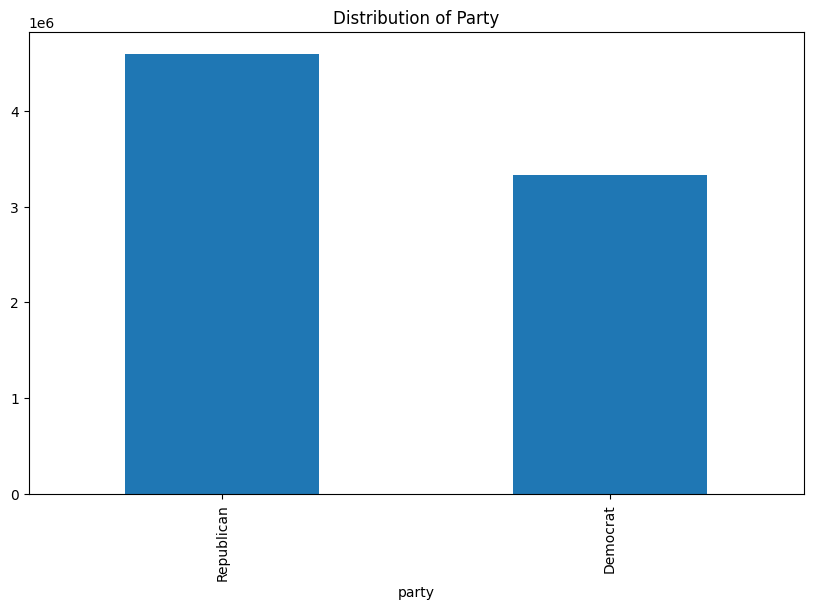

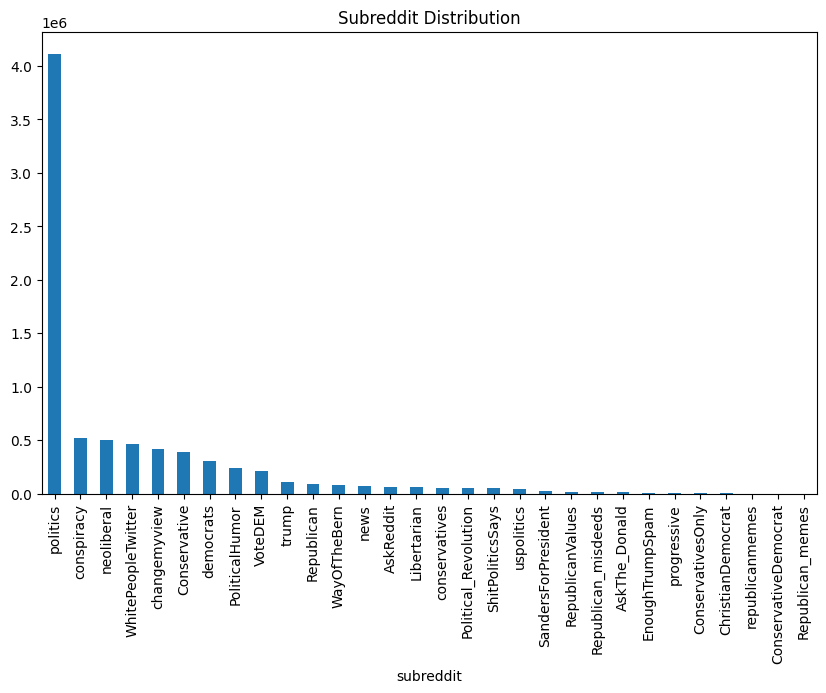

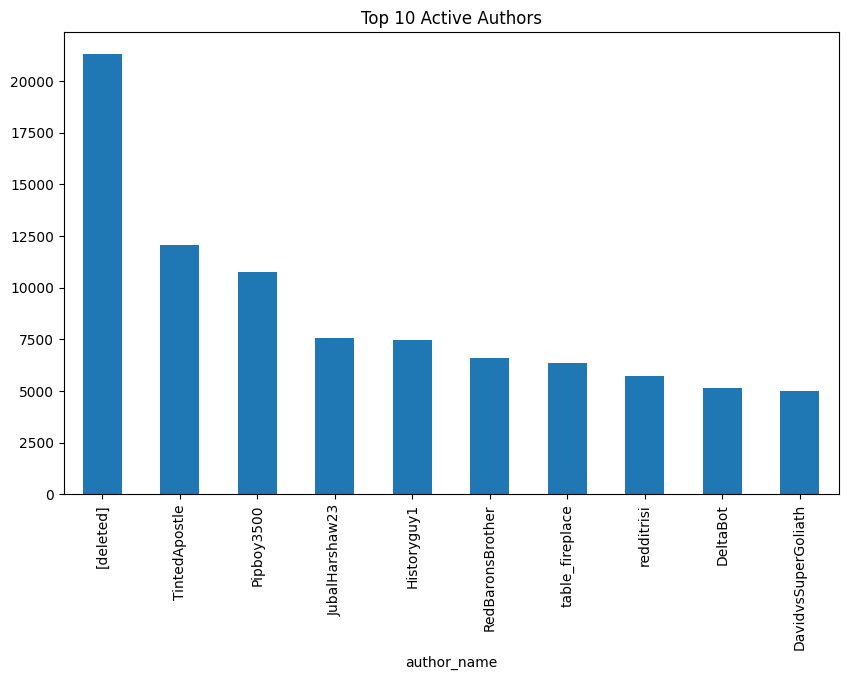

In [8]:
df['party'].value_counts().plot(kind='bar', figsize=(10, 6), title='Distribution of Party')
plt.show()

df['subreddit'].value_counts().plot(kind='bar', figsize=(10, 6), title='Subreddit Distribution')
plt.show()

df['author_name'].value_counts().head(10).plot(kind='bar', figsize=(10, 6), title='Top 10 Active Authors')
plt.show()

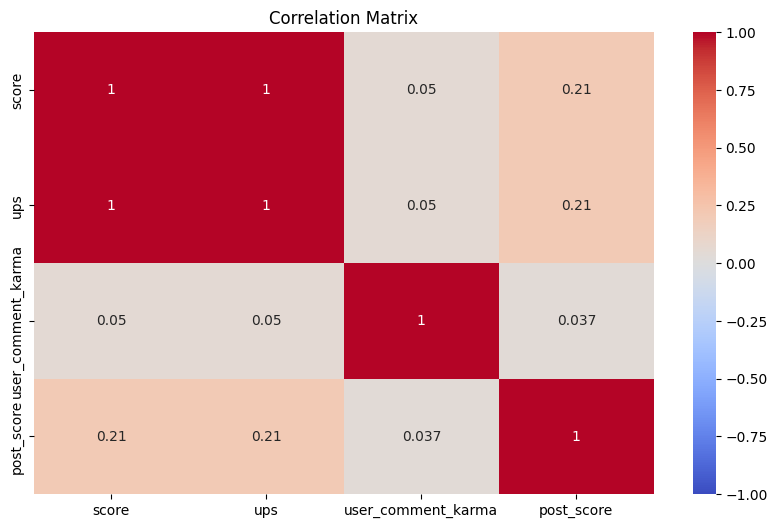

In [9]:
corr_matrix = df[['score', 'ups', 'user_comment_karma', 'post_score']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

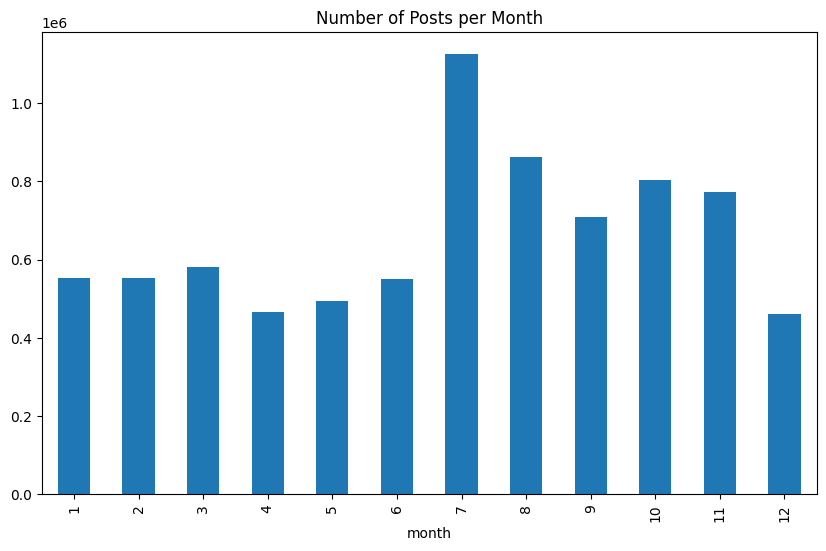

In [10]:
df['created_time'] = pd.to_datetime(df['created_time'])

df['date'] = df['created_time'].dt.date
df['month'] = df['created_time'].dt.month
df['year'] = df['created_time'].dt.year

df.groupby('month')['post_id'].count().plot(kind='bar', figsize=(10, 6), title='Number of Posts per Month')
plt.show()

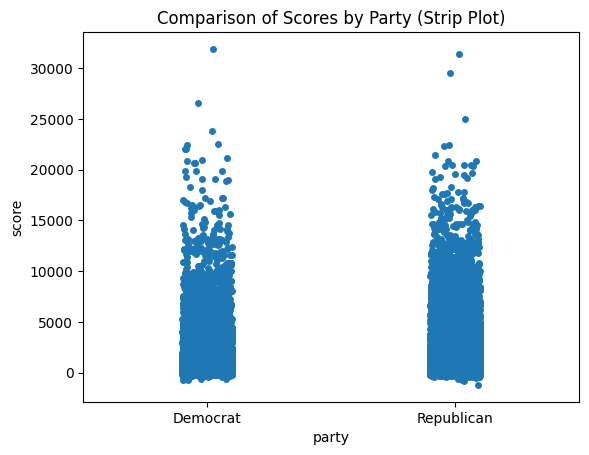

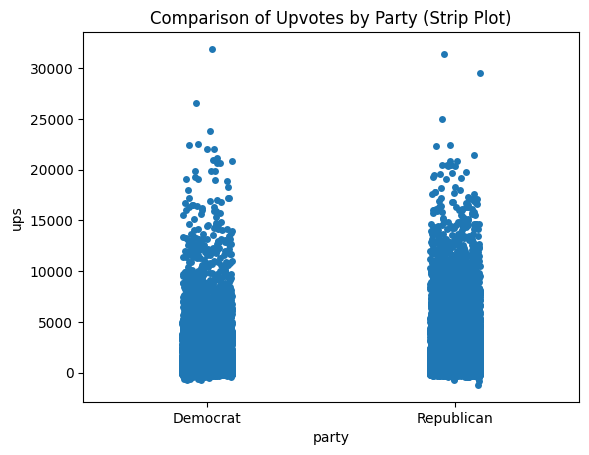

In [11]:
sns.stripplot(x='party', y='score', data=df, jitter=True)
plt.title('Comparison of Scores by Party (Strip Plot)')
plt.show()

sns.stripplot(x='party', y='ups', data=df, jitter=True)
plt.title('Comparison of Upvotes by Party (Strip Plot)')
plt.show()

In [12]:
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    return analyzer.polarity_scores(str(text))['compound']

tqdm.pandas()
df['sentiment_score_self_text'] = df['self_text'].progress_apply(get_vader_sentiment)
df['created_time'] = pd.to_datetime(df['created_time'])
df.set_index('created_time', inplace=True)

df_democrat = df[df['party'] == 'Democrat']
df_republican = df[df['party'] == 'Republican']

daily_sentiment_democrat = df_democrat['sentiment_score_self_text'].resample('D').mean().fillna(0)
daily_sentiment_republican = df_republican['sentiment_score_self_text'].resample('D').mean().fillna(0)

100%|██████████| 7929732/7929732 [28:51<00:00, 4580.29it/s]  


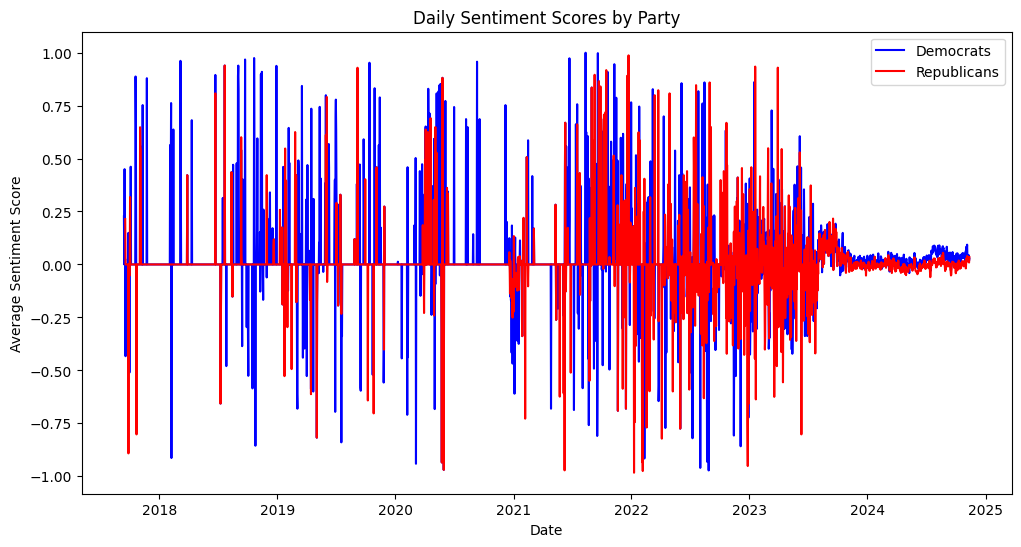

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment_democrat.index, daily_sentiment_democrat, label='Democrats', color='blue')
plt.plot(daily_sentiment_republican.index, daily_sentiment_republican, label='Republicans', color='red')
plt.title('Daily Sentiment Scores by Party')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.show()

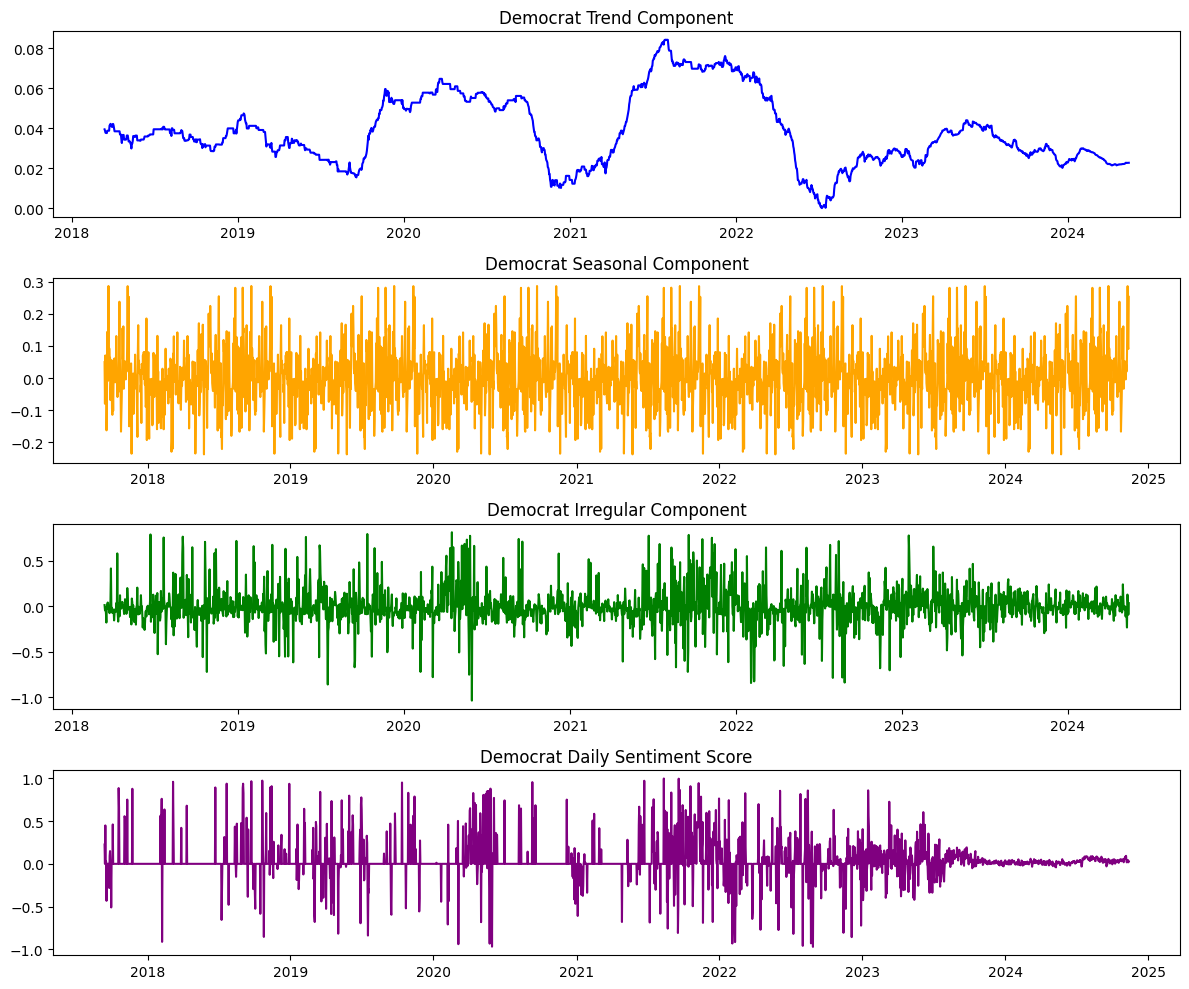

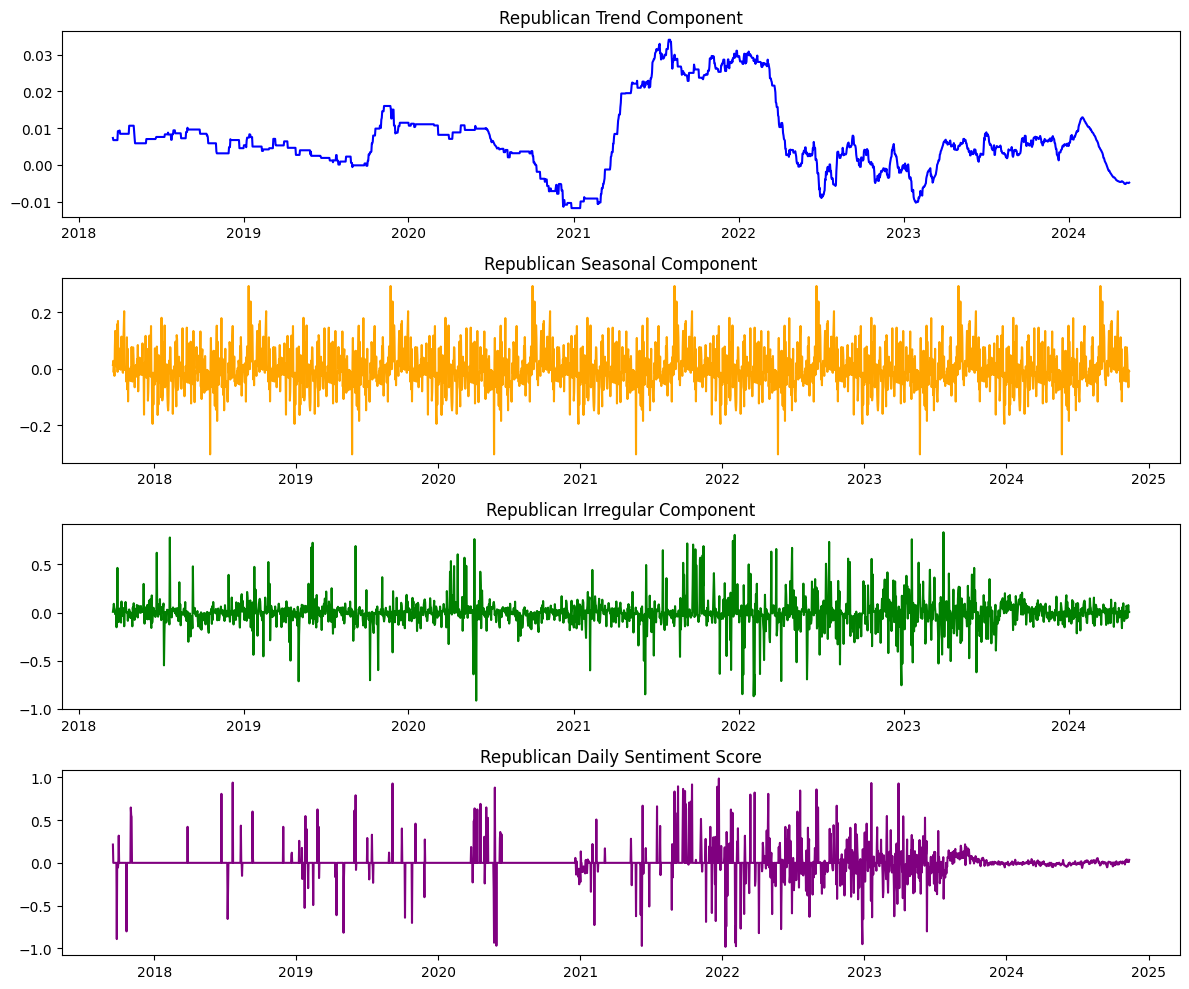

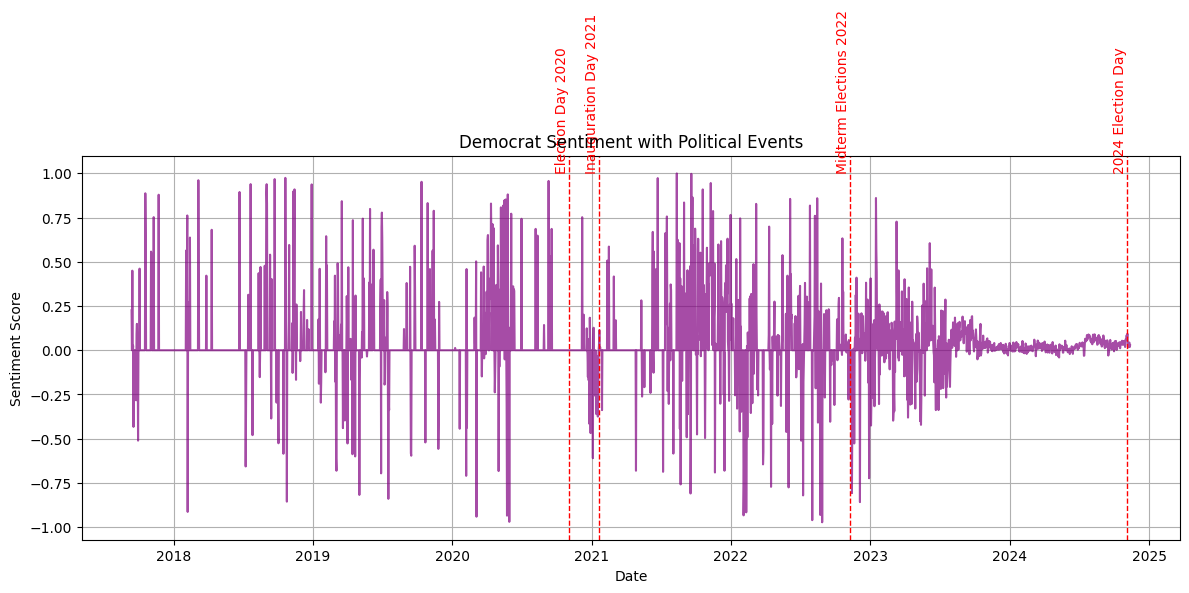

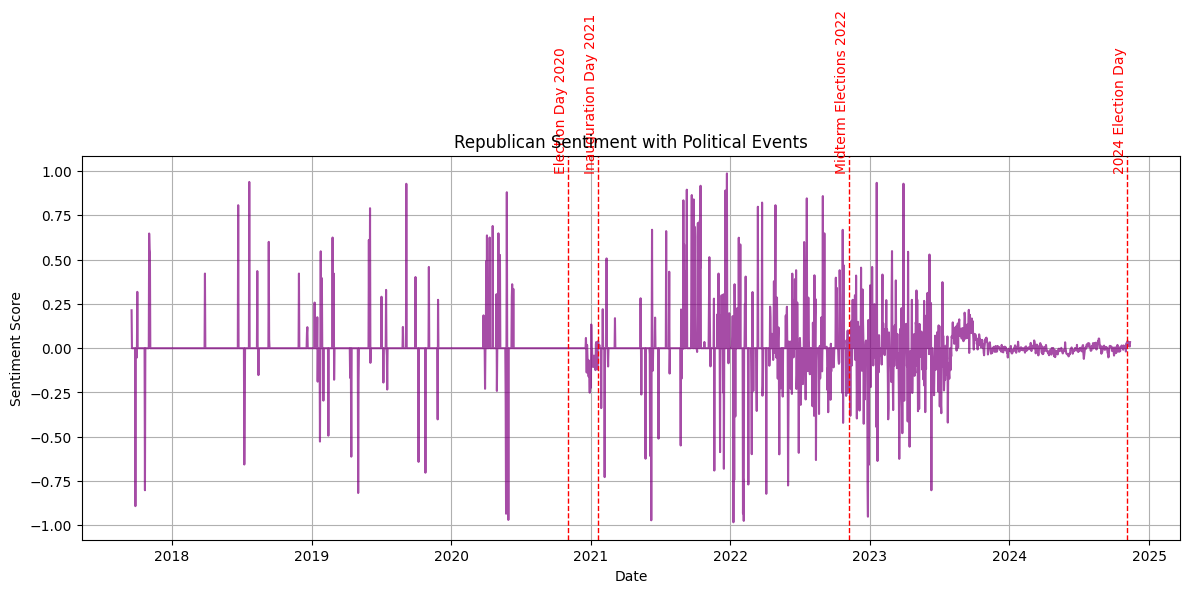

In [14]:
decomposition_democrat = seasonal_decompose(daily_sentiment_democrat, model='additive', period=365)

plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(decomposition_democrat.trend, color='blue')
plt.title('Democrat Trend Component')
plt.subplot(412)
plt.plot(decomposition_democrat.seasonal, color='orange')
plt.title('Democrat Seasonal Component')
plt.subplot(413)
plt.plot(decomposition_democrat.resid, color='green')
plt.title('Democrat Irregular Component')
plt.subplot(414)
plt.plot(daily_sentiment_democrat, color='purple')
plt.title('Democrat Daily Sentiment Score')
plt.tight_layout()
plt.show()

# Time series decomposition for Republican
decomposition_republican = seasonal_decompose(daily_sentiment_republican, model='additive', period=365)

plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(decomposition_republican.trend, color='blue')
plt.title('Republican Trend Component')
plt.subplot(412)
plt.plot(decomposition_republican.seasonal, color='orange')
plt.title('Republican Seasonal Component')
plt.subplot(413)
plt.plot(decomposition_republican.resid, color='green')
plt.title('Republican Irregular Component')
plt.subplot(414)
plt.plot(daily_sentiment_republican, color='purple')
plt.title('Republican Daily Sentiment Score')
plt.tight_layout()
plt.show()

# Plot sentiment with political events
event_dates = {
    "Election Day 2020": "2020-11-03",
    "Inauguration Day 2021": "2021-01-20",
    "Midterm Elections 2022": "2022-11-08",
    "2024 Election Day": "2024-11-05"
}

# Democrat sentiment with events
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment_democrat, color='purple', alpha=0.7)
for event, date in event_dates.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', linewidth=1)
    plt.text(pd.to_datetime(date), daily_sentiment_democrat.max(), event, rotation=90, color='red', ha='right', va='bottom')
plt.title('Democrat Sentiment with Political Events')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Republican sentiment with events
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment_republican, color='purple', alpha=0.7)
for event, date in event_dates.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', linewidth=1)
    plt.text(pd.to_datetime(date), daily_sentiment_republican.max(), event, rotation=90, color='red', ha='right', va='bottom')
plt.title('Republican Sentiment with Political Events')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.tight_layout()
plt.show()

### Sentiment Decomposition Analysis: Democrat vs. Republican

#### **Democrat Sentiment Analysis**
- **Trend Component**
  - **Mean**: 0.0384
  - **Standard Deviation**: 0.0175
  - **Range**: 0.0002 to 0.0842
  - **Interpretation**: Weak but steady upward trend in sentiment over time.

- **Seasonal Component**
  - **Mean**: 0.0007
  - **Standard Deviation**: 0.0915
  - **Range**: -0.2369 to 0.2861
  - **Interpretation**: Small average value, indicating noticeable seasonal variation.

- **Residual Component**
  - **Mean**: -0.00066
  - **Standard Deviation**: 0.1995
  - **Range**: -1.035 to 0.810
  - **Interpretation**: Irregular fluctuations, suggesting random noise after removing trend and seasonality.

- **Overall Sentiment**
  - **Mean**: 0.0377
  - **Standard Deviation**: 0.2118
  - **Range**: -0.972 to 0.999
  - **Interpretation**: Neutral sentiment with noticeable variation.

#### **Republican Sentiment Analysis**
- **Trend Component**
  - **Mean**: 0.0071
  - **Standard Deviation**: 0.0097
  - **Range**: -0.0117 to 0.0341
  - **Interpretation**: Very weak upward trend in sentiment.

- **Seasonal Component**
  - **Mean**: 0.0006
  - **Standard Deviation**: 0.0703
  - **Range**: -0.3033 to 0.2933
  - **Interpretation**: Small average seasonal fluctuations, similar to the Democrat sentiment.

- **Residual Component**
  - **Mean**: 0.0002
  - **Standard Deviation**: 0.1538
  - **Range**: -0.9136 to 0.8333
  - **Interpretation**: Random irregularities, showing noise after decomposing trend and seasonality.

- **Overall Sentiment**
  - **Mean**: 0.0063
  - **Standard Deviation**: 0.1604
  - **Range**: -0.9829 to 0.9868
  - **Interpretation**: Neutral sentiment with smaller fluctuation compared to Democrat sentiment.

---

### **Key Insights**
- **Democrat Sentiment**:
  - Shows a **slightly upward trend** with **significant seasonal variation**.
  - **Residual component** shows higher volatility, indicating more irregular fluctuations.
  - Overall, sentiment is **neutral** with some **moderate variation**.

- **Republican Sentiment**:
  - Displays a **very weak upward trend** with **smaller seasonal variation**.
  - The **residual component** shows less volatility, indicating **more consistency**.
  - Overall, sentiment is **neutral**, but with **smaller fluctuations** compared to the Democrat sentiment.

- **Conclusion**:
  - **Democrat sentiment** exhibits more **fluctuations** and **seasonality**.
  - **Republican sentiment** is more **consistent**, with smaller variations and a weaker trend.

---

These results provide a detailed understanding of the **sentiment dynamics** for both political parties over time, which can be correlated with **political events** for further analysis.
